In [ ]:
!pip install yfinance
import pandas as pd
#used to grab the stock prices, with yahoo
#import pandas_datareader as web #pause use until yahoo issue is fixed
from pandas_datareader import data as web #for workaround until yahoo issue is fixed
import yfinance as yfin #for workaround until yahoo issue is fixed
yfin.pdr_override() #for workaround until yahoo issue is fixed
from datetime import datetime, date, timedelta
#to visualize the results
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#select start date for correlation window as well as list of tickers
#now = date.today()
#start = datetime(2020, 1, 1)

now = date.today() - timedelta(days=1)
ttm = date.today() - timedelta(days=365)
now.strftime('%Y-%m-%d')
ttm.strftime('%Y-%m-%d')

'2020-07-07'

In [ ]:
#Choose Tickers
symbols_list = ['BTC-USD', 'ETH-USD', '^GSPC', '^IXIC', '^DJI', '^TNX', 'GBTC', 'ETHE', 'COIN']

#array to store prices
symbols=[]

#pull price for each symbol in list defined above
for ticker in symbols_list: 
    #r = web.DataReader(ticker, 'yahoo', start) #pause use until yahoo issue is fixed
    r = web.get_data_yahoo(ticker, start=ttm, end=now)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# concatenate into df
df = pd.concat(symbols)
df = df[df.index.dayofweek < 5]
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df = df.set_index('Date')
df['Symbol'] = df['Symbol'].replace({'BTC-USD': 'Bitcoin', 'ETH-USD': 'Ethereum', 
                                     '^GSPC': 'S&P 500', '^IXIC': 'Nasdaq', '^TNX': 'Yield Index 10 Year Treasury Bond', 
                                     '^DJI': 'Dow Jones', 'GBTC': 'Grayscale BTC', 'ETHE': 'Grayscale ETH', 'COIN': 'Coinbase'})
df_pivot = df.pivot(columns='Symbol', values='Close')
df_pivot = df_pivot.dropna()

In [ ]:
# calculate daily returns
returns_daily = df_pivot.pct_change()
btc_returns = returns_daily['Bitcoin']
eth_returns = returns_daily['Ethereum']
sp_returns = returns_daily['S&P 500']
nas_returns = returns_daily['Nasdaq']
ten_yr_returns = returns_daily['Yield Index 10 Year Treasury Bond']
dj_returns = returns_daily['Dow Jones']
gbtc_returns = returns_daily['Grayscale BTC']
ethe_returns = returns_daily['Grayscale ETH']
coin_returns = returns_daily['Coinbase']


Text(0.5, 1.0, '30 Day Bitcoin Correlation')

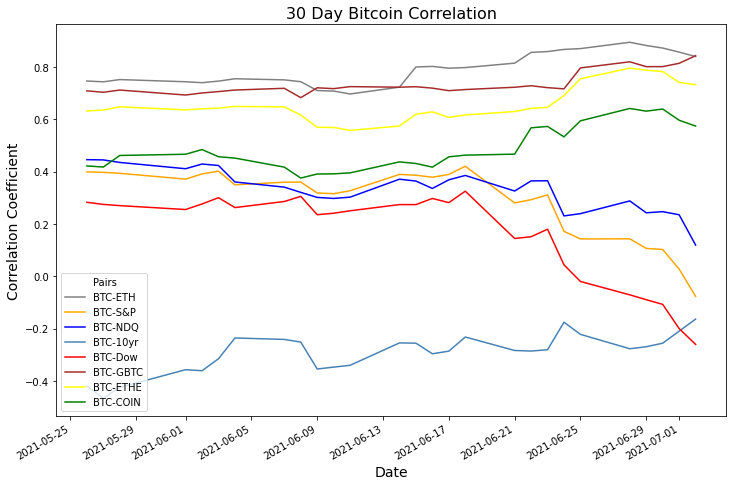

In [ ]:
#calculate & plot correlation
period = 30
btc_eth_corrs = btc_returns.rolling(period).corr(other=eth_returns).dropna()
btc_sp_corrs = btc_returns.rolling(period).corr(other=sp_returns).dropna()
btc_nas_corrs = btc_returns.rolling(period).corr(other=nas_returns).dropna()
btc_ten_yr_corrs = btc_returns.rolling(period).corr(other=ten_yr_returns).dropna()
btc_dj_corrs = btc_returns.rolling(period).corr(other=dj_returns).dropna()
btc_gbtc_corrs = btc_returns.rolling(period).corr(other=gbtc_returns).dropna()
btc_ethe_corrs = btc_returns.rolling(period).corr(other=ethe_returns).dropna()
btc_coin_corrs = btc_returns.rolling(period).corr(other=coin_returns).dropna()

btc_eth_corrs.plot(figsize=(12,8), label='BTC-ETH', color='gray')
btc_sp_corrs.plot(figsize=(12,8), label='BTC-S&P', color='orange')
btc_nas_corrs.plot(figsize=(12,8), label='BTC-NDQ', color='blue')
btc_ten_yr_corrs.plot(figsize=(12,8), label='BTC-10yr', color='steelblue')
btc_dj_corrs.plot(figsize=(12,8), label='BTC-Dow', color='red')
btc_gbtc_corrs.plot(figsize=(12,8), label='BTC-GBTC', color='brown')
btc_ethe_corrs.plot(figsize=(12,8), label='BTC-ETHE', color='yellow')
btc_coin_corrs.plot(figsize=(12,8), label='BTC-COIN', color='green')

#add legend
plt.legend(title='Pairs')

#add axes labels and a title
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.title('30 Day Bitcoin Correlation', fontsize=16)